-----------------------
-----------------------
# Random Variables

Khan Academy:
https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library

-----------------------
---------------------

Random variables are ways to map outcomes of random processed to numbers. Usually random variables are noted by capital letters, e.g. **X**.  

* **Discrete Random Variable** - Take distinct/separate values
* **Continuous Random Variables** - Take any value in interval

**Example - Discrete Random Variable**. Let's say we want to estimate the number of people we will see in the line in store. We conduct an experiment by visiting the store 50 times. Out of the 50 times we observe 0 people 24 times, 1 person 18 times, and 2 people 8 times. We estimate the probabilities as shown below.

| People in the line | Times Observed | Probability Estimate |
| :------------------ | :-------------- | :-----------------:
| 0 | 24 | $\frac{24}{24+18+8}=\frac{24}{50}$ = 0.48 = 48% |
| 1 | 18 | $\frac{18}{50}$ = 0.36 = 36% |
| 2 | 8 | $\frac{8}{50}$ = 0.16 = 16% |

Now, let's say we plan to visit the store 500 times in the coming two years. How many times do we expect to see a 2 people line? A reasonable expectiation would be

\begin{equation*}
500 \cdot \frac{8}{50} = 80
\end{equation*}



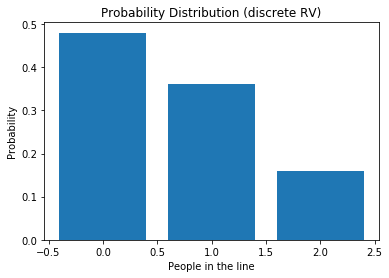

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

_= plt.bar([0,1,2], [0.48, 0.36, 0.16])
_= plt.xlabel('People in the line')
_= plt.ylabel('Probability')
_= plt.title('Probability Distribution (discrete RV)')

**Example - Continuous Random Variable**. The probability of exact height of a randomly selected student from your school. Exact height means we are not rounding the numbers. But we don't even have a way to measure the exact height. That's a continuous random variable.  

* For continuous random variables the probability of observing one exact number is not possible, so $P(X = x) = 0$. That's why, the probability of a continuous random variable is rather $P(|X-x|<\epsilon)$, where $\epsilon$ is a very small number. And it's equal to the erea under the curve as shown below.

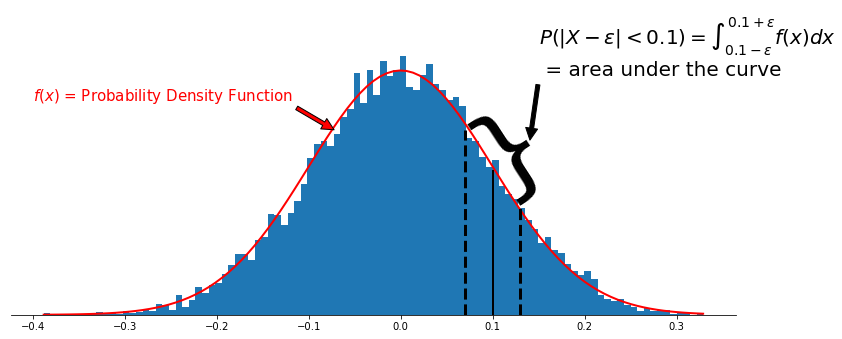

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## simulate random normals
np.random.seed(1234)
mu, sigma = 0, 0.1
nums = np.random.normal(mu, sigma, 10000)

# plot the distribution
plt.figure(figsize=(13,5))
count, bins, ignored = plt.hist(nums, bins=100, normed=True)
_= plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
            linewidth=2, color='r')

## add vertical lines
epsilon = 0.03
_= plt.axvline(0.1, ymax=0.53, linewidth=2, color='black')
_= plt.axvline(0.1+epsilon, ymax=0.4, linewidth=3, color='black', linestyle='--')
_= plt.axvline(0.1-epsilon, ymax=0.68, linewidth=3, color='black', linestyle='--')

## add the probability formula and arrow
_= plt.annotate('$P(|X-\epsilon|<0.1) = \int_{0.1-\epsilon}^{0.1+\epsilon}f(x)dx$\n = area under the curve',
                xy=(0.14, 2.8), xytext=(0.15, 4),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)
## add curly brackets
_= plt.text(0.06, 2.18, '$\}$', fontsize=106, rotation=33)

## add f(x) and arrow
_= plt.annotate('$f(x)$ = Probability Density Function', xy=(-0.07, 3), xytext=(-0.4, 3.5),
                arrowprops=dict(facecolor='r', shrink=0.05), fontsize=15, color='r')

## remove the top, left, and right axis
_= plt.gca().spines['top'].set_visible(False)
_= plt.gca().spines['left'].set_visible(False)
_= plt.gca().spines['right'].set_visible(False)
_= plt.gca().yaxis.set_major_locator(plt.NullLocator()) 

-----------------------------------
### Mean and Variance

Let's say we have a discrete random variable X which is equal to the number of workouts in a week.

 | X | P(X)
 | - | - 
 | 0 | 0.1
 | 1 | 0.15
 | 2 | 0.4
 | 3 | 0.25
 | 4 | 0.1
 
**Expected value/Mean**. The expected value of $X$ is  


\begin{equation*}
E(X) = \mu_x = 0\cdot0.1 + 1\cdot0.15 + 2\cdot0.4 + 3\cdot0.25 + 4\cdot0.1 = 2.1 
\end{equation*}

So the expected number of workouts in a week is 2.1.
 
**Variance and Standard Deviation**. Variance is a measure of spread.  

*Variance*  

\begin{equation*}
Var(X) = (0-2.1)^2\cdot0.1 + (1-2.1)^2\cdot0.15 + (2-2.1)^2\cdot0.4 + (3-2.1)^2\cdot0.25 + (4-2.1)^2\cdot0.1 = 1.19
\end{equation*}  

*Standard Deviation*  

\begin{equation*}
\sigma_x = \sqrt{Var(X)} = \sqrt{1.19} \approx 1.09
\end{equation*}

------------------------------------
### The sum and difference of two random variables

If $X$ and $Y$ are indipendent random variables, than 

$$\boxed{
\begin{align*}
E(X + Y) &= E(X) + E(Y)\\
E(X - Y) &= E(X) - E(Y) \\
Var(X \pm Y) &= Var(X) + Var(Y)
\end{align*}
}
$$
--------------------------------

**Deriving variance of the difference of random variables**  

\begin{align*}
Var(X-Y)&=E[(X-Y-E(X-Y))^2]\\
        &=E[((X-E(X))-(Y-E(Y))^2]\\
        &=E[(X-E(X))^2-2\cdot(X-E(X))\cdot(Y-E(Y))+E(Y-E(Y))^2]\\
        &=E[(X-E(X))^2]-E[2\cdot(X-E(X))\cdot(Y-E(Y))]+E[(Y-E(Y))^2]\\
        &=Var(X)-0+Var(Y)\\
        &=Var(X)+Var(Y)
\end{align*}

-----------------------------------
## Binomial Variables

* Made up of independent trials
* Each trial has one of two discrete outcomes (either success or failure)
* Fixed number of trials
* Probability of success on each trial is constant

**Example - Binomial**. Number of heads after 10 flips of a coin.  
**Example - not a Binomial**. Number of kings after taking 2 cards from standard deck **without** replacement (the taking of the second card is dependent of the first card).  
**Example - Binomial**. Number of kings after taking 2 cards from standard deck **with** replacement.

______________________________________________

### **10% Rule of Assuming "Independence" ** 

If our sample is less than or equal to the 10% of the population, it is ok to assume an approximate independence.

_____________________________________________

### Binomial Probability Formula

If $X$ is a Binomial Random Variable with a probability of success equal to $p$, then the probability of $k$ successes out of $n$ trials is

\begin{align*}
\boxed{
\begin{equation*}
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}
\end{equation*}
}
\end{align*}
---------------------------------------


where $\binom{n}{k}$ is read "n choose k" and denotes the number of k-combinations of n elements without repetition.

\begin{equation*}
\binom{n}{k} = \frac{n!}{k!\cdot(n-k)!}
\end{equation*}

--------------------------------------------------------
### Expected Value and Variance of Bernoulli Distribution

* Bernoulli distribution is the simplest case of Binomial distribution when there is **only 1 trial**.  
* If the probability of success (1) is $p$, and the probability of the failure (0) is $1-p$, then the expected value, mean, and the variance of a Bernoulli random variable are

$$
\boxed{
\begin{align*}
\mu &= p \\
\sigma^2 &= p(1-p)
\end{align*}
}
$$
---------------------------

\begin{align*}
\mu &= (1-p)\cdot0 + p\cdot1 \\
    &= p
\end{align*}

\begin{align*}
\sigma^2 &= (1-p)\cdot(0-\mu)^2+p\cdot(1-\mu)^2 \\
         &= (1-p)\cdot(0-p)^2+p\cdot(1-p)^2 \\
         &= (1-p)\cdot p^2+p\cdot(1-2p+p^2) \\
         &= p - p^2 \\
         &= p(1-p)
\end{align*}

--------------------------------------------------------
### Expected Value and Variance of Binomial Distribution

If we have a Binomial random variable, $X$, with a probability of success equal to $p$ and n trials, then the **expected value of $X$** is

$$\boxed{
\begin{align*}
E(X) &= np\\
Var(X) &= np(1-p)
\end{align*}
}$$
------------------


**Explanation**. $X$ consists of $n$ independent Bernoulli random variables, $X_1, X_2, ..., X_n$, each of which has a probability of success equal to $p$ then

\begin{align*}
E(X) &= E(X_1 + X_2 + ... +X_n) \\
     &= E(X_1) + E(X_2) + ... + E(X_n) \\
     &= p + p + ... + p\\
     &= np
\end{align*}

\begin{align*}
Var(X) &= Var(X_1 + X_2 + ... + X_n)\\
       &= Var(X_1) + Var(X_2) + ... + Var(X_n)\\
       &= np(1-p)
\end{align*}

---------------------------------------
## Geometric Random Variable

* Made up of independent trials
* Each trial has one of two discrete outcomes (either success or failure)
* Probability of success on each trial is constant
* **Number of trials is not defined. How many trials will there be until the success?**

**Example**. Number of trials until a head occurs.

---------------------------------------
### Cumulative Geometric Probability (more than a value)

* $V$ is a geometric random variable - the number of vehicles Emillia registers each day until she first registers an SUV. 
* The probability of success for each trial is equal to $p$ - SUV cars make up $p\cdot 100$ percent of the vehicles Emillia registers each day.
* What is the probability that the success will happen after the $k$ trials - Emillia will register k vehicles before she registers an SUV?

\begin{align*}
\boxed{P(V > k)} &= P(V=k+1) + P(V=k+2) + ...\\
                 &= P({\text{first k trials fail}})\\
                 &\boxed{= (1-p)^k}
\end{align*}



---------------------------------------
### Cumulative Geometric Probability (less than a value)

\begin{align*}
P(V < k) &= P(V=1) + P(V=2) + ... + P(V=k-1)\\
         &= p +p\cdot (1-p) + ... + p \cdot (1-p)^{k-2}\\
\end{align*}

Or an easyer way

\begin{align*}
\boxed{P(V < k)} &= P(V \leq k-1)\\
                 &= 1 - P(V > k-1) \\
                 &\boxed{= 1 - (1-p)^{k-1}}
\end{align*}

---------------------------------------
### Expected Value of Geometric Random Variable

Let's say we have a Geometric Random Variable, $X$. $X$ is a number of independent trials to get "success", where P(success) for each trial is $p$.

\begin{align*}
\boxed{E(X) = \frac{1}{p}}
\end{align*}
---------------------------

\begin{align*}
E(X) &= P(X=1)\cdot 1 + P(X=2)\cdot 2 + P(X=3)\cdot 3 + ...\\
E(X) &= 1p + 2p(1-p) + 3p(1-p)^2 + ... \\
(1-p)E(X) &= \quad\quad 1p(1-p) + 2p(1-p)^2 + 3p(1-p)^3 + ... \\
E(X) - (1-p)E(X) &= 1p + 1p(1-p) + 1p(1-p)^2 + ...\\
E(X) + (p-1)E(X) &= 1p + 1p(1-p) + 1p(1-p)^2 + ...\\
pE(X) &= p + p(1-p) + p(1-p)^2 + ...\\
E(X) &= 1 + (1-p) + (1-p)^2 + ... \stackrel{\text{geometric series}}{=} \frac{1}{1-(1-p)}\\
E(X) &= \frac{1}{p}
\end{align*}

---------------------------
## Law of Large Numbers

Let's say we have a random variable $X$ and we know its expected value, $E(X) = \mu$. The law of large numbers says that if we take $n$ observations of our random variable, $X_1, X_2, ..., X_n$ and average all of the observations, $\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}$, than the mean will approach to the expected value of the population, $\bar{X} \to E(X)$, for $n \to \infty$.

---------------------------
## Poisson Process  

**Example**. X is the number of cars that pass in one hour. $X$ is a Poisson random variable. The goal is to figure out the probability distribution of that random variable $X$. Once we figure out the probability distribution of $X$, we can say what the probability is that $10$ cars pass in an hour, $100$ cars pass in an hour, no cars pass in an hour, etc.

**Two assumprions** to move on with the Poisson distribution:

1. Any hour is no different than any other hour.
2. If a bunch of cars pass in an hour that doesn't mean that fewer cars will pass in the next hour.

Let's say we count the number of cars passing in an hour for many hours. Then we average those numbers and get an estimator of the actual mean of our random variable. It will be the expected value of $X$, $E(X) = \lambda$.

We know that for a binomial distribution the expected value is equal to the number of trials times the probability of success, $np$. Let's try to do the same for our random variable $X$.

* Let's make each **trial to be whether a car passes in $1$ minute**, $E(X)=\lambda=np$. There are $60$ minutes in one hour so there will be $60$ trials, $n=60$. Hence, if we model this as a Binomial random variable, the probability of the success in each minute will be $\frac{\lambda}{60}$ cars per minute. Then from binomial distribution

\begin{equation*}
P(X=k) = \binom{60}{k} \cdot \big(\frac{\lambda}{60}\big)^k \cdot \big(1-\frac{\lambda}{60}\big)^{60-k}
\end{equation*}
    
* What if more than $1$ car passes in a minute? Then let's make each **trial to be whether a car passes in $1$ second**, $n=3600$. Then the probability of success, probability that a car passes in a second, will be $\frac{\lambda}{3600}$ and

\begin{equation*}
P(X=k) = \binom{3600}{k} \cdot \big(\frac{\lambda}{3600}\big)^k \cdot \big(1-\frac{\lambda}{3600}\big)^{3600-k}
\end{equation*}

* What if more than $1$ car passes in a second? This means we have to increase the number of trials again and again. This is how we get a Poisson distribution.(When the number of intervals, $n$, approaches infinity). 

Couple of mathematical tools to move forward.  

1. $\boxed{\frac{x!}{(x-k)!} = x\cdot(x-1)\cdot(x-2)\cdot...\cdot(x-k+1)}$
2. $\boxed{\lim_{x\to\infty} \big(1+\frac{a}{x}\big)^x = e^a}$   
    **Proof**. Let's make a substitution, $\frac{a}{x} = \frac{1}{n}$, then $x = na$, then $x\to\infty$ is the same as $n\to\infty$. Hence
    
\begin{align*}
\lim_{n\to{\infty}} \big(1+\frac{1}{n}\big)^{na} &= \lim_{n\to{\infty}} \big(\big(1+\frac{1}{n}\big)^n\big)^a \\
                                                 &= \big(\lim_{n\to{\infty}} \big(1+\frac{1}{n}\big)^n\big)^a \\
                                                 &\stackrel{\lim_{n\to{\infty}} (1+\frac{1}{n})^n = e}{=} e^a                                            
\end{align*}  

Hence, if we describe our random variable $X$ as a binomial, we should get

\begin{align*}
P(X=k) &= \lim_{n\to\infty} \binom{n}{k} \cdot \big(\frac{\lambda}{n}\big)^k \cdot \big(1-\frac{\lambda}{n}\big)^{(n-k)}\\  
       &= \lim_{n\to\infty} \frac{n!}{k!(n-k)!} \cdot \big(\frac{\lambda}{n}\big)^k \cdot \big(1-\frac{\lambda}{n}\big)^n \cdot \big(1-\frac{\lambda}{n}\big)^{-k}\\
       &= \lim_{n\to\infty} \frac{n \cdot (n-1) \cdot... \cdot (n-k+1)}{n^k} \cdot \frac{\lambda^k}{k!} \cdot \big(1-\frac{\lambda}{n}\big)^n \cdot \big(1-\frac{\lambda}{n}\big)^{-k}\\
       &\stackrel{{n \cdot (n-1) \cdot... \cdot (n-k+1)}{\text{ k-degree polinomial}}}{=} \frac{\lambda^k}{k!} \cdot \lim_{n\to\infty} \frac{n^k + ...}{n^k} \cdot \lim_{n\to\infty}\big(1-\frac{\lambda}{n}\big)^n \cdot \big(1-\frac{\lambda}{n}\big)^{-k}\\
           &= \frac{\lambda^k}{k!} \cdot 1 \cdot e^{-\lambda} \cdot 1\\
\end{align*}

So the probability that $k$ cars pass in an hour is

$$\boxed{
\begin{align*}
P(X=k) &= \lim_{n\to\infty}  \binom{n}{k} \big(\frac{\lambda}{n}\big)^k \big(1-\frac{\lambda}{n}\big)^{(n-k)} = \frac{\lambda^k}{k!} e^{-\lambda} 
\end{align*}
}$$
------------------------------------

-----------------------
---------------------------
# SAMPLING DISTRIBUTIONS

Khan Academy: https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library

--------------------------
-----------------------

**Sampling distribution** is a distribution of a sample statistic.

* Take a sample of size $n$ from the population of interest
* Calculate the mean (sample statistic) of that sample.
* Repeat the first two steps to obtain the sampling distribution of the sample mean.

Of course, the above steps can be done for other sample statistics as well to obtain their sampling distributions.

------------------------------------------
## Sampling Distribution of Sample Proportion

Let's say we have a jar of $10000$ gumballs and the proportion of yellow gumballs in that jar is $p$ (population parameter). Let's say $p = 0.6$. 

* Let's define a **Bernoulli** random variable $Y$ in the following way:

\begin{equation}
  Y = \begin{cases}
    1, & \text{pick yellow}.\\
    0, & \text{not yellow}.
  \end{cases}
\end{equation}
     
     We know the mean and standard deviation of Bernoulli random variable, so

\begin{align*}
\mu_{Y} &= p = 0.6\\
\sigma_{Y} &= \sqrt{p(1-p)} = \sqrt{0.6\cdot0.4}
\end{align*}

* Let's now define a random variable $X = {\text{SUM of 10 independent trials of Y}}$.  
$X$ is a **Binomial** random variable and its mean and standard deviation are

\begin{align*}
\mu_{X} &= np = 10\cdot0.6 \\
\sigma_{X} &= \sqrt{np(1-p)} = \sqrt{10\cdot0.6\cdot0.4}
\end{align*}

Now, let's think about the sampling distribution of the sample proportion. 

* Take a sample of $10$ from the gumball and calculate the PROPORTION of yellow gumballs, $\hat{p}$.
$$\hat{p} = \frac{X}{n} = \frac{X}{10}$$
* Repeat the first step over and over again.
* As we are taking only $10$ gumballs, which is less than $10\%$ of the total gumballs in the jar, we can assume independence between those $10$ gumballs.

After many times of sampling, we will get the sampling distribution of a sample proportion which will have mean and standard deviation shown below.

$$
\boxed{
\begin{align*}
\mu_{\hat{p}} & = p \\
\sigma_{\hat{p}} &= \sqrt{\frac{p\cdot(1-p)}{n}}
\end{align*}
}
$$
-----------------------------------

Because

\begin{align*}
\mu_{\hat{p}} &= \frac{\mu_X}{n} = \frac{n\cdot p}{n} = p \\
\sigma_{\hat{p}} &= \frac{\sigma_X}{n} = \frac{\sqrt{n\cdot p \cdot(1-p)}}{n} = \sqrt{\frac{p\cdot(1-p)}{n}}
\end{align*}

In our example $\mu_{\hat{p}} = 0.6$, $\sigma_{\hat{p}} = \sqrt{\frac{0.6\cdot0.4}{10}} \approx 0.15$

---------------------------------------------------------------------
### Normal conditions for sampling distribution of sample proportions

The rule of thumbs: The samling distribution of sample proportion is roughly normal if

$$
\boxed{
\begin{align*}
&np \ge 10 \\
&n(1-p) \ge 10
\end{align*}
}
$$

What if the above rules are violated? Then the sampling distribution of sample proportion is not normal. What is its shape then?
We know that the sample proportion is equal to the population proportion. Then

* If the population proportion is higher than $50 \%$, we will have a left skewed sampling distribution of sample proportion.
* If the population proportion is less than $50 \%$, than we will have a right skewed sampling distribution of sample proportion.

**Intuition**. As the sample size increases, the standard deviation becomes smaller so the sampling distribution of sample proportions concentrates around the population proportion and is roughly symmetric, hence normal. For smaller sample sizes, the standard deviation is high and we have long tails either in the right or left directions. 

## Z-score

The Z-score of an observation is the number of standard deviations it falls above or below the mean. We compute the Z-score for an observation $x$ that follows a distribution with mean $\mu$ and standard deviation $\sigma$ using

$$\boxed{Z = \frac{x-\mu}{\sigma}}$$

* observations above the mean always have positive Z-scores, while those below the mean have negative Z-scores.
* If an observation is equal to the mean, then the Z-score is $0$.

------------------------------------------
## Central Limit Theorem

Central Limit Theorem says that no matter what the distribution of the population is, if we take large enough samples ($n$ is large) from that population and calculate their means, then those means will be approximately normally distributed with the mean equal to the population mean and standard deviation (called standard error) equal to the population's standard deviation divided by square root of $n$.

* In other words, for large sample size of $n$, sample mean, $\bar{x}$, is approximately normally distributed

\begin{equation*}
\bar{x} \sim N\Big(\mu, \frac{\sigma^2}{n}\Big)
\end{equation*}

   where $\mu$ is the population mean and $\sigma^2$ is the population variance.

**Example.** Look at an example of simulated exponentials and how their mean has an approximately normal distribution: https://github.com/arstepanyan/Statistical-Inference-Project-1/blob/master/Means_of_Exponentials.pdf

**Standard error of the mean** is the *standard deviation* of the sampling distribution of the sample mean and it's equal to $\frac{\sigma}{\sqrt{n}}$

* The larger the sample size, the smaller the standard deviation of the sampling distribution of the sample mean. This means that large samples result in a sampling distribution of the sample mean that is more consentrated around the population mean.

**The shape of the sampling distribution**

When a population is not normally distributed, the sampling distribution of sample mean, $\bar{x}$ depends on the sample size.
* For smaller samples ($n < 30$), the shape of the sampling distribution of $\bar{x}$ will match the shape of the parent population.
* For larger samples ($n \ge 30$), the central limit theorem tells us that the sampling distribution of $\bar{x}$ will be approximately normal regardless of the shape of the parent population.

----------------------------------------------------------------------------------------------------------
### Formal Definition of Central Limit Theorem

*From the book "All of Statistics: A Concise Course in Statistical Inference (Springer Texts in Statistics) by Larry Wasserman" (https://books.google.com/books/about/All_of_Statistics.html?id=qrcuBAAAQBAJ&printsec=frontcover&source=kp_read_button#v=onepage&q&f=false)*

Suppose that $X_1, ..., X_n$ are IID with mean $\mu$ and variance $\sigma^2$. The central limit theorem (CLT) says that $\bar{X_n} = n^{-1} \sum_{i} X_i$  has a distribution which is approximately Normal with mean $\mu$ and variance $\sigma^2/n$. This is remarkable since nothing is assumed about the distribution of $X_i$, except the existence of the mean and variance.

**Theorem (The Central Limit Theorem (CLT)).** *Let $X_1, ..., X_n$ be IID with mean $\mu$ and variance $\sigma^2$*. Let $\bar{X_n} = n^{-1} \sum_{i} X_i$. Then

\begin{equation*}
Z_n \equiv \frac{\bar{X_n} - \mu}{\sqrt{\mathbb{V}(\bar{X_n})}} = \frac{\sqrt{n} \left( \bar{X_n} - \mu \right)}{\sigma} \approx Z
\end{equation*}

where $Z \sim N(0,1)$ . In other words ,

\begin{equation*}
\lim_{n\to\infty}\mathbb{P}(Z_n \leq z) = \phi(z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx
\end{equation*}

_________________________________________________________________________________________________________

**Interpretation:** Probability statements about $\bar{X_n}$ can be approximated using a Normal distribution. It's the probability statements that we are approximating, not the random variable itself.

-------------------
----------------------
# Confidence Intervals

Khan Academy: https://www.khanacademy.org/math/statistics-probability/confidence-intervals-one-sample

-------------------
-----------------------

## Confidence Interval for the Population Proportion

**Example**. Let's say we have around $100000$ people who are going to vote on an upcoming election. In an ideal situation, we would ask every one of the voters who they are going to vote for. Then we would know the actual population proportion. But in reality, we are not able to ask every one of them who they are going to vote for. So we sample from the population. 

1. Take a sample of, let's say $100$ voters
2. Calculate the proportion who will vote for a candidate of our interest
3. Repeat the above $2$ steps with new samples

### Check the conditions for the sampling distribution of sample proportion  

* **Normality**: If we make an assumption that the true population propotion isn't too close to $0$ or $1$, then the normality conditions ($np\ge10, n(1-p)\ge10$) will be met and we will have a sampling distribution of sample proportion that is roughly normal. 
* **Independence**: And as $n=100$ sample size is less than $10 \%$ of $100000$ voters, we can assume that each voter in our sample is independent from other voters.

### Remember the mean and the standard deviation of the sample proportion 

From Sampling Distribution of Sample Proportion, we know the mean of this sampling distribution is going to be the actual population proportion, $p$, and the standard deviation of the sample proportion is going to be actual proportion's standard deviation devided by square root of n, $\sqrt{\frac{p(1-p)}{n}}$.

$$
\begin{align*}
\mu_{\hat{p}} & = p \\
\sigma_{\hat{p}} &= \sqrt{\frac{p\cdot(1-p)}{n}}
\end{align*}
$$

### Start thinking about confidence intervals  



* We can say that there is $95 \%$ chance that our sample proportion, $\hat{p}$, will be within $2$ standard deviations away from the population proportion, $p$. **Why $95 \%$?** Because from normal table we know that approximately $95 \%$ of the distribution is within 2 standard deviations from the mean. 

OR

* If we take samples and calculate their proportions, then $95 \%$ of the times these calculated sample proportions will be within 2 standard deviations from the true population proportion.

**OR**

* If we take samples and calculate their proportions, then $95 \%$ (**confidence level**) of the times the intervals constructed around those sample proportions (**confidence intervals**) will contain the true population proportion.

**Note**. If we decrease the confidence level or increase the sample size, the length of the intervals will decrease.

### The form of confidence interval for population proportion

To construct confidence intervals around sample proportions, we need the actual population proportion as it is used both to calculate the mean and the standard deviation of the sample proportion. But most of the times we *don't know the actual population proportion*. Then we will use the sample proportion as it's estimator and will get the **standard error, SE**, of the sample proportion which is equal to

\begin{align*}
\mu_{\hat{p}} &= \hat{p}\\
SE_{\hat{p}} &= \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{align*}

**Note**: We use the name **standard error** for the standard deviation of the sample proportion when we use the sample proportion as an estimate of the actual population proportion in the formula.

Finally, **confidence interval for the population proportion** is

$$\boxed{\hat{p} \pm z^\ast \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}$$  
---------------------------------

where $z^\ast$ **critical value** corresponds to the confidence level selected.

* In our example the confidence level was $95\%$ and the critical value for that confidence level is $1.96$ (from z-table), which we rounded to $2$ in our above discussions.
* Commonly used confidence levels in practice are $90\%$, $95\%$, $98\%$, $99\%$, their critical values are $1.645$, $1.96$, $2.33$, $2.575$ respectively.

### Condition for a Valid Confidence Interval for population proportion

* **Random**: The data needs to come from a random sample or randomized experiment.
* **Normal**: The sampling distribution of $\hat{p}$ needs to be approximately normal — needs at least $10$ expected successes and $10$ expected failures. In other words, $n\hat{p}\ge10$ and $n(1-\hat{p})\ge10$.
* **Independent**: Individual observations need to be independent. If sampling without replacement, our sample size shouldn't be more than $10\%$ of the population, $n<10\%$ of population.

-------------------------
## Confidence Interval for the population mean


* From central limit theorem, we know that if we take a large enough sample (within each sample the observations are identical, independent), then it's mean, $\bar{X}$, is normally distributed no matter what the distribution of the population is. This sampling distribution's mean is equal to the population mean, $\mu_{\bar{X}} = \mu$, and standard deviation of that mean is equal to the population standard deviation divided by square root of the sample size, $S = \frac{\sigma}{\sqrt{n}}$.

* We don't have the actual population mean and standard deviation, then we estimate those using the sample mean and sample standard deviation to get
$$\mu_{\bar{X}} = \bar{X}$$
$$SE_{\bar{X}} = \frac{S}{\sqrt{n}} $$  
     where $S$ is the standard deviation and $SE$ is **Standard Error** of the sampling distribution. 

* Then, the **confidence interval for the population mean is**

$$\boxed{\bar{X} \pm z^\ast \frac{S}{\sqrt{n}}}$$ 
------------------------------

-----------------------
## Confidence interval for any statistic and any confidence level

If the point estimate follows the normal model with standard error SE, then a confidence interval for the population parameter is

$$\boxed{{\text{point estimate }} \pm z^{\ast} SE}$$
---------------

where $z^\ast$ **critical value** corresponds to the confidence level selected  

-----------------------
### Margin of Error

In a confidence interval $z^\ast$ SE is called **Margin of Error**

---------------------
### t-statistic

* When we are trying to construct a confidence interval for the population mean and we don't have the true population standard deviation, it turns out that using $z^{\ast}$ underestimates the true margin of errer. That's why
* we use **t-statistics**
* instead of z-table, we use t-table.
* **Degrees of freedom (df)**: The degrees of freedom describe the shape of the t-distribution. **The larger the degrees of freedom, the more closely the distribution approximates the normal model**.
* t-distribution is similar to normal distribution with fatter tails.
* t-confidence interval for the mean

$$\boxed{\bar{X} \pm t^\ast \frac{S}{\sqrt{n}}}$$ 
------------------------------



--------------------------
## Condition for a Valid Confidence Interval for Population Mean

* **Random**: A random sample or randomized experiment should be used to obtain the data.
* **Normal**: The sampling distribution of $\hat{X}$ (the sample mean) needs to be approximately normal. This is true if our parent population is normal or if our sample is reasonably large ($n \ge 30$).  
    * The big idea is that we need to graph our sample data when $n < 30$ and then make a decision about the normal condition based on the appearance of the sample data.
* **Independent**: Individual observations need to be independent. If sampling without replacement, our sample size shouldn't be more than $10\%$ of the population, $n<10\%$ of population.

-----------------------
## Interpreting confidence interval for a population mean

* A confidence interval for a mean gives us a range of plausible values for the population mean.
* If a confidence interval does not include a particular value, we can say that it is not likely that the particular value is the true population mean. 
* Even if a particular value is within the interval, we shouldn't conclude that the population mean equals that specific value.


-------------
## Confidence interval for a mean with paired data

* Two sets of observations are paired if each observation in one set has a special correspondence or connection with exactly one observation in the other data set.
* When we work with paired data, we're interested in the difference between the two observations. A t-interval can be useful for estimating the mean difference.
$$\boxed{\bar{x_{diff}} \pm t^\ast\frac{S_{diff}}{\sqrt{n_{diff}}}}$$

* **Interpret the interval**: Does the interval suggest that there is a difference between the two data sets?
    * If the **interval contains 0** - which represents **no difference** - then it's plausible that there is no difference between the two data sets.
    * If the **entire interval is above 0, or below 0**, then it **suggests a difference** between the two data sets.

----------------------
## Sample size for a given margin of error for a mean

If we know the population standard deviation, $\sigma$, and want to find a minimum sample size, $n$, for which the margin of error will be less than a particular value, $a$, we would do

\begin{align*}
&z^\ast \cdot \frac{\sigma}{\sqrt{n}} \le a\\
&\sqrt{n} \ge \frac{z^\ast \cdot \sigma}{a}\\
&n \ge \Big( \frac{z^\ast \cdot \sigma}{a} \Big)^2\\
\end{align*}

------------------
------------------
# Significance tests (hypothesis testing)

Khan Academy: https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample

------------------
------------------

## The idea of significance tests

* Let's say we have a website with an off white color for its background. And we know that the mean amount of time that people spend in our website is $20$ minutes.    
* We want to make a change that will make people spend more time in our website. We decide to change the background color to yellow.  
* How can we be sure that the change of color indeed makes people stay longer in our website?
* We do a **significance test**

The steps we take  
1. **Null Hypothesis**, $H_0$, vs **Alternative Hypothesis**, $H_A$  
    $H_0$: $\mu = 20$ after the change  
    $H_A$: $\mu > 20$ after the change
2. **Significance level**, $\alpha$: In practice, we should make our hypotheses and set our significance level before we collect or see any data.    
    * After changing the background color, we take a sample from our website's users and calculate their mean spending time, $\bar{x}$.
    * **We reject the null hypothesis**: If we assume that the null hypothesis is true, then if the probability of getting a sample with the statistic that we get (here $\bar{x}$) is less than $\alpha$ significance level, we reject the null hypothesis and say that we have enough evidence for the alternative hypothesis.
    * **We don't have enough evidence to reject the null hypothesis**: If we assume that the null hypothesis is true, then if the probability of getting a sample with the statistic that we get (here $\bar{x}$) is equal to or greater than $\alpha$ significance level, we don't have enough evidence to reject the null hypothesis. 
3. **Take Sample**. We take a sample of, let's say 50 users ($n=50$), after changing the background color to yellow. We calculate the mean amount of time they spend in our website, let's say $\bar{x}=25$, and the standard deviation, $S$. 
4. **p-value** 
    * The probability of getting a statistic at least as far away from the mean as $\bar{x}=25$, if we were to assume that the null hypothesis is true 
    * $P(\bar{x}\ge25 {\text{ }}|{\text{ }} H_0 {\text{  is true}})$ - a conditional probability
5. Make a decision
    * If $p{\text{-value}} < \alpha \Rightarrow$ reject $H_0$ in favor of $H_A$  
    * If $p{\text{-value}} \ge \alpha \Rightarrow$ fail to reject $H_0$ 

Let's say that we also know that the amount of time people spend in our website is normally distributed with standard deviation 17, $\mu=20, {\text{std}}=17$.

To see how likely a sample with the mean spending time of 25 minutes was to occur by random chance alone, we perform a simulation. We simulate 120 samples of n=50 users from a normal population with a mean of 20 minutes and standard deviation of 17 minutes. We record the mean of the spending times in each sample.

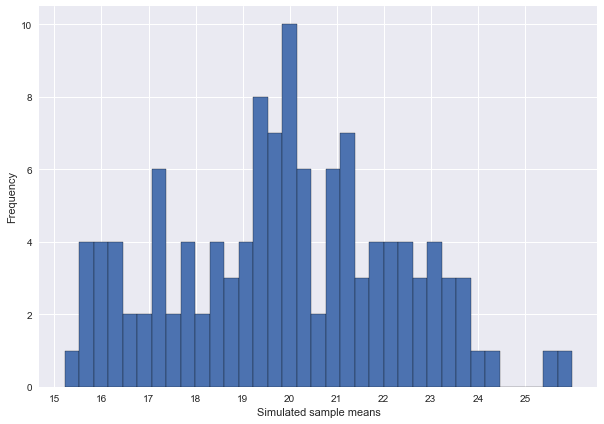

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

np.random.seed(99999)
means = []
for i in range(120):
    samples = np.random.normal(20, 17, size=50)
    means.append(np.mean(samples))

## plot the simulated means
plt.figure(figsize=(10,7))
p = plt.hist(means, bins=35, edgecolor='black')
_ = plt.xlabel('Simulated sample means')
_ = plt.ylabel('Frequency')
_ = plt.xticks(range(int(min(means)), int(max(means)), 1))

* We want to test $H_0$: $\mu = 20$ minutes vs $H_A$: $\mu > 20$ minutes, where $\mu$ is the true mean amount of time that people spend in our website after changing the background color to yellow. 
* We **choose a significance level**. Let's choose $\alpha=0.05$.
* We **calculate the p-value**, $P(\bar{x}\ge25 {\text{ }}|{\text{ }} H_0 {\text{  is true}})$  
$$ P(\bar{x} \ge 25 {\text{ }} | {\text{ }} H_0) = \frac{{\text{mean spending time} \ge 25}}{{\text{number of samples}}} = \frac{1+1}{120} \approx 0.02 $$
    The yellow colored bins (shown in the plot below) are the mean spending times that are equal to or greater than 25 minutes when we assume that the true mean amount of time people spend in our website after the change is $20$ minutes.

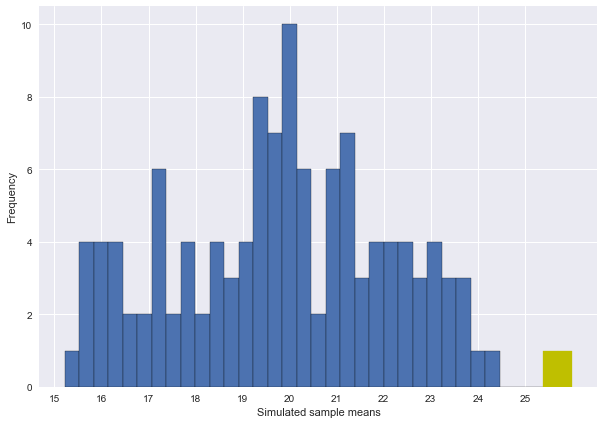

In [4]:
##### same plot as above with values equal to or greater than 25 minutes colored by yellow color
plt.figure(figsize=(10, 7))
p = plt.hist(means, bins=35, edgecolor='black')
_ = plt.xlabel('Simulated sample means')
_ = plt.ylabel('Frequency')
_ = plt.xticks(range(int(min(means)), int(max(means)), 1))
for i in range(33, 35):
    _ = p[2][i].set_color('y')

* **Make a decision**: **We reject the null hypothesis in favor of alternative**
    * Because our p-value is approximately $0.02$ and it's less than $0.05$ significance level.  
    * In other words, observing a mean spending time that is equal to or greater than $25$ minutes is unusual when the mean spending time is $20$ minutes. Hence, the mean spending time of $25$ minutes is most probably coming from a distribution other than the one with the mean $20$.
    * This means that we have enough evidence to say that changing the background color of our website to yellow made people spend more time in the website. 

---------------
## Error probabilities and power

What if the decision we made as a result of our significance test is actualy not true? For our website example, what if the 25 minutes of mean amount of time that people spend in our website indeed is a part of sample means with a mean equal to 20 minutes. This is a Type I error. 

* **Type I error**. Rejecting $H_0$ when $H_0$ is true
* **Type II error**. Failing to reject $H_0$ when $H_A$ is true



![title](companion_files/error_table.png)

* There is about $\alpha$ chance of making Type 1 error if the null hypothesis is true.

$$P({\text{Type 1 error }} | {\text{ }} H_0 {\text{  is true}}) = \alpha$$ 

* Increasing $\alpha$ increases Type 1 error.

### Power of the test

Power of the test is the probability of correctly rejecting $H_0$

\begin{align*}
{\text{Power}} &= P({\text{Reject }} H_0 {\text{ }} | {\text{ }} H_0 {\text{  false}})\\
               &= 1 - P({\text{Not rejecting }} H_0 {\text{ }} | {\text{ }} H_0 {\text{ false}})\\
               &= 1 - P({\text{Type 2 error}})\\
               &= P({\text{Not making Type 2 error}})
\end{align*}

Look at the plot below
* The blue curve is when Null hypothesis is true
* The red curve is when the alternative hypothesis is true
* Suppose that the null hypothesis is actually false, then the power of the test is the erea under the red curve that is filled with dotted lines.

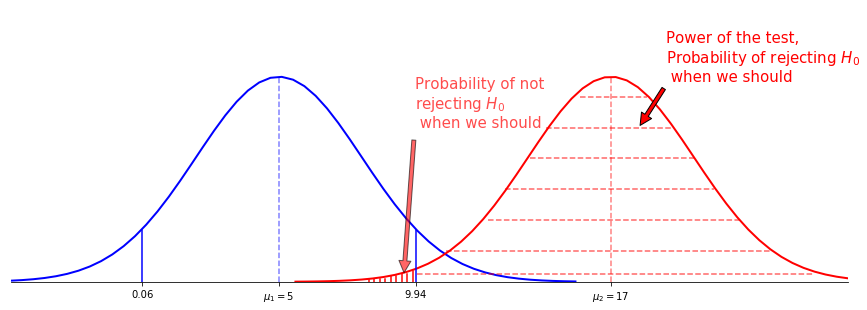

In [6]:
import numpy as np
import matplotlib.pyplot as plt
sns.reset_orig()

s1_mean, s1_std = 5, 3
s2_mean, s2_std = 17, 3

np.random.seed(123)
s1 = np.random.normal(s1_mean, s1_std, size=1000)
s2 = np.random.normal(s2_mean, s2_std, size=1000)
alpha = 0.1
z_score = 1.645            # from z-table. When alpha=0.1, we are looking for the 95% probability in the table
x1 = round(-1.645*3+5, 2)  # from z = (x-mean)/sigma
x2 = round(1.645*3+5, 2)   # from z = (x+mean)/sigma
 
plt.figure(figsize=(15, 5))

## normal curves
count1, bins1, ignored1 = plt.hist(s1, bins=50, normed=True, histtype='step', color='white')
_ = plt.plot(bins1, 1/(s1_std * np.sqrt(2 * np.pi)) * np.exp( - (bins1 - s1_mean)**2 / (2 * s1_std**2) ),
            linewidth=2, color='b')

count2, bins2, ignored2 = plt.hist(s2, bins=50, normed=True, histtype='step', color='white')
_= plt.plot(bins2, 1/(s2_std * np.sqrt(2 * np.pi)) * np.exp( - (bins2 - s2_mean)**2 / (2 * s2_std**2) ),
            linewidth=2, color='r')

## frame and axes visability
_ = plt.gca().axes.get_yaxis().set_visible(False)
_= plt.gca().spines['top'].set_visible(False)
_= plt.gca().spines['left'].set_visible(False)
_= plt.gca().spines['right'].set_visible(False)

## x limits and xticks
_ = plt.xlim(min(s1), max(s2))
_ = plt.xticks((x1, s1_mean, x2, s2_mean))
_ = plt.gca().set_xticklabels((x1, '$\mu_1 = {}$'.format(s1_mean), x2, '$\mu_2 = {}$'.format(s2_mean)))

## vertical lines
_ = plt.axvline(s1_mean, ymax=0.75, color='b', linestyle='--', alpha=0.5)
_ = plt.axvline(s2_mean, ymax=0.75, color='r', linestyle='--', alpha=0.5)
_ = plt.axvline(x1, ymax=0.19, color='b')
_ = plt.axvline(x2, ymax=0.19, color='b')

## fill in with lines to note the probability of not rejecting H0 when we should
## NOTE: I am sure there is a better way of filling in under the curve. 
##       But after some time of searching, it doesn't seam to be streightforward.
##       That's why I am manually plotting several lines
x_coords = [x2-0.1, x2-0.3, x2-0.5, x2-0.7, x2-0.9, x2-1.1, x2-1.3, x2-1.5, x2-1.7]
y_heights = [0.04, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.009, 0.009]
for (x, y) in zip(x_coords, y_heights):
    _ = plt.axvline(x, ymax=y, color='r')

## annotate
_ = plt.annotate('Probability of not \nrejecting $H_0$\n when we should', xy=(9.5, 0.001), xytext=(9.9, 0.1),
                arrowprops=dict(facecolor='r', shrink=0.05, alpha=0.6), fontsize=15, color='r', alpha=0.7)

## fill in with lines to note the power of test (the probability of rejecting H0 when we should)
y_coords = [.12, .1, .08, .06, .04, .02, .005]
x_heights_min = [.68, .64, .62, .59, .57, .52, .485]
x_heights_max = [.76, .79, .82, .84, .87, .91, .96]
for y, x_min, x_max in zip(y_coords, x_heights_min, x_heights_max):
    _ = plt.axhline(y, xmin=x_min, xmax=x_max, color='r', linestyle='--', alpha=0.6)

## annotate
_ = plt.annotate('Power of the test, \nProbability of rejecting $H_0$\n when we should', xy=(18, 0.1), xytext=(19, 0.13),
                arrowprops=dict(facecolor='r', shrink=0.05), fontsize=15, color='r')

--------------
## Tests about a population proportion

---------------------------
## Tests about a population mean
